In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from log_columns import log_columns
plt.rcParams['figure.figsize'] = (16, 9)

In [2]:
movies = pd.read_csv("./data/movies_reg_df.csv", index_col=0)
movies.head()

,id,name,year,genre,ratingCount,bestRating,worstRating,ratingValue,directorMaxEffect,actorMaxEffect,...,y2013,y2014,y2015,y2016,y2017,y2018,y2019,y2020,y2021,y2022
0,10344754,毒战 毒戰,2012,"['剧情', '动作', '犯罪']",210072,10,2,7.5,34235,27592,...,0,0,0,0,0,0,0,0,0,0
1,10355621,粉红女郎之爱人快跑,2013,"['喜剧', '爱情']",1826,10,2,3.2,65,3861,...,1,0,0,0,0,0,0,0,0,0
2,10355633,绝命藏宝图,2012,"['动作', '悬疑']",78,10,2,3.2,43,43,...,0,0,0,0,0,0,0,0,0,0
4,10430281,七个隆咚锵咚锵,2012,"['喜剧', '爱情']",506,10,2,4.9,115,161,...,0,0,0,0,0,0,0,0,0,0
5,10437802,武当少年 武當少年,2010,"['剧情', '儿童']",68,10,2,6.1,2,192,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# scale to between 0 and 1
y = movies.ratingValue * 0.1

In [4]:
X = movies.iloc[:, 11:]
X.insert(0, "intercept", 1)
log_columns(X, ["directorSumEffect", "actorSumEffect", "writerSumEffect"])
X.head()

,intercept,l_directorSumEffect,l_actorSumEffect,l_writerSumEffect,d动画,d悬疑,d剧情,d西部,d犯罪,d灾难,...,y2013,y2014,y2015,y2016,y2017,y2018,y2019,y2020,y2021,y2022
0,1,10.441033,11.586780,8.910721,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4.189655,9.522154,4.189655,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,3.784190,4.248495,3.784190,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,4.753590,5.831882,4.753590,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1.098612,5.455321,1.098612,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# fit OLS for comparison
ols = sm.OLS(y, X)
ols_res = ols.fit(cov_type="hc3")
print(ols_res.summary())

                            OLS Regression Results                            
Dep. Variable:            ratingValue   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     66.25
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:07:51   Log-Likelihood:                 2157.7
No. Observations:                2996   AIC:                            -4235.
Df Residuals:                    2956   BIC:                            -3995.
Df Model:                          39                                         
Covariance Type:                  hc3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept               0.4794    

<AxesSubplot:ylabel='ratingValue'>

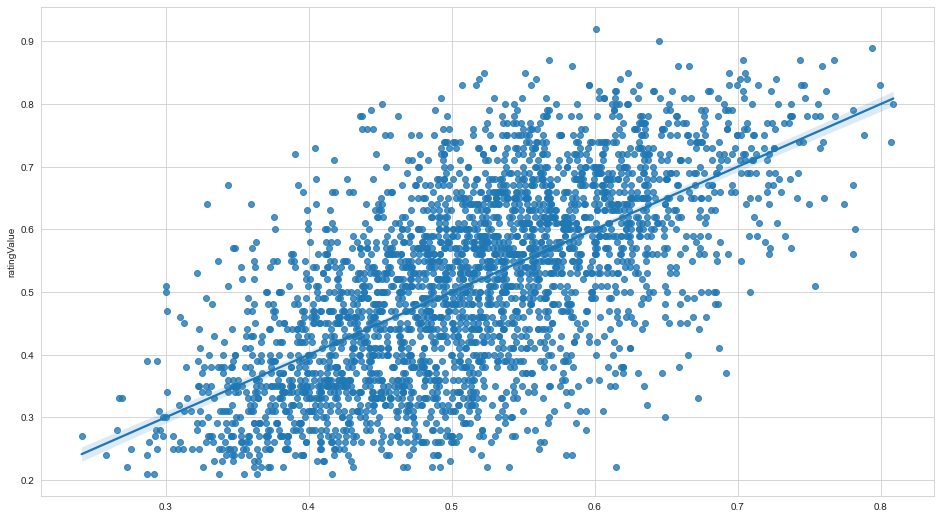

In [6]:
sns.regplot(x=ols_res.fittedvalues, y=y)

In [19]:
glm = sm.GLM(y, X, family=sm.families.Binomial())
glm_res = glm.fit(cov_type="hc3")
print(glm_res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            ratingValue   No. Observations:                 2996
Model:                            GLM   Df Residuals:                     2956
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1360.6
Date:                Sat, 02 Jul 2022   Deviance:                       174.95
Time:                        17:07:58   Pearson chi2:                     172.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03756
Covariance Type:                  hc3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept              -0.0841    

<AxesSubplot:ylabel='ratingValue'>

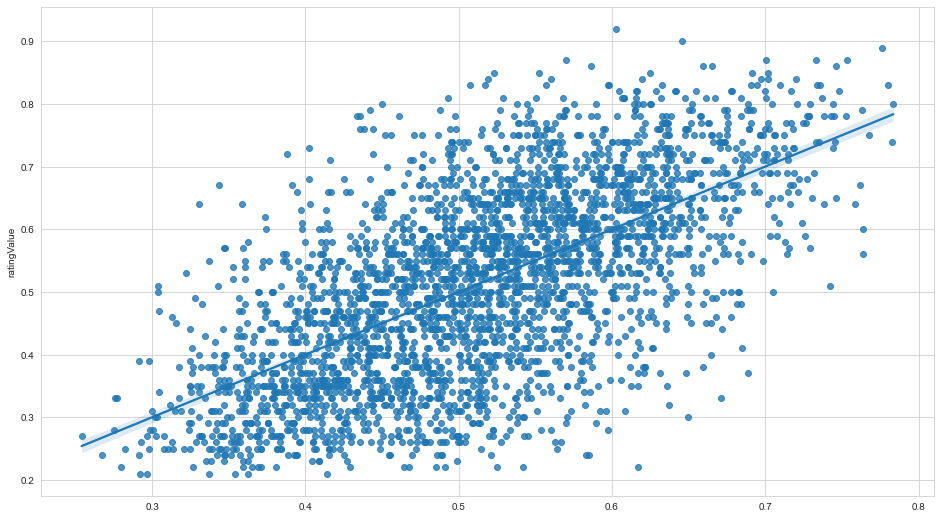

In [8]:
sns.regplot(x=glm_res.fittedvalues, y=y)

<AxesSubplot:>

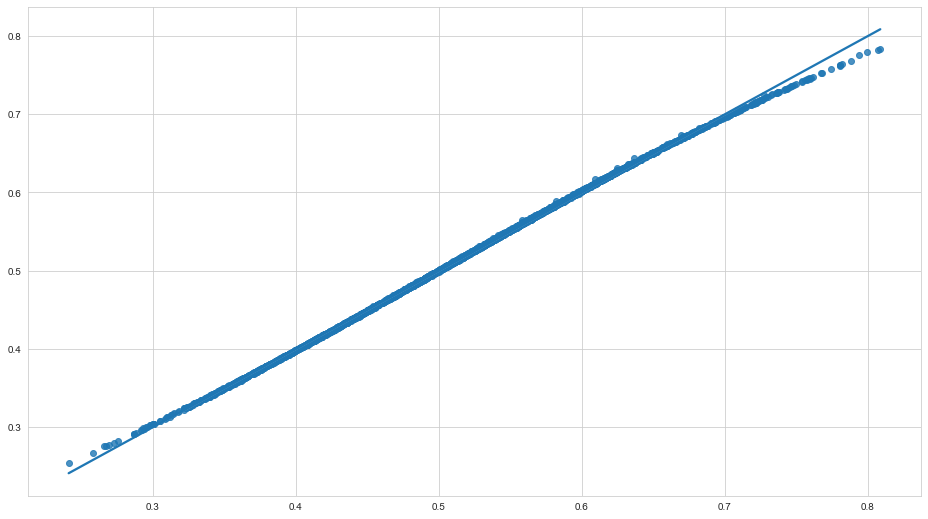

In [15]:
sns.regplot(x=ols_res.fittedvalues, y=glm_res.fittedvalues)

In [26]:
ols_res.ssr

41.54385227421291

In [23]:
np.sum([i ** 2 for i in ols_res.resid])

41.54385227421291

In [25]:
np.sum([i ** 2 for i in glm_res.resid_response])
# not sure this is valid for logistic regression... but there appears to be no substantial difference in fit.

41.48788248450157